# Metadata

```yaml
Course:  DS 5100
Module:  07 Python Classes
Topic:   HW 07 Stock Class
Author:  R.C. Alvarado
Date:    7 July 2023
```

# Student Info

* Name: Jacqui Unciano
* Net UD: jdu5sq
* URL of this file in GitHub:

# Instructions

In your **private course repo on Rivanna**, use this Jupyter notebook and the data file described to write code that performs the tasks below. 

Save your notebook in the `M07` directory.

Remember to add and commit these files to your repo. 

Then push your commits to your repo on GitHib.

Be sure to fill out the **Student Info** block above.

To submit your homework, save the notebook as a PDF and upload it to GradeScope, following the instructions.

**TOTAL POINTS: 12**

# Overview

In this assignment you will define a class and use it to perform the requested tasks.

Before answering the questions, read the market data from `apple_data.csv` into a Pandas dataframe. The file is in the HW for this module in the course repo.

# Setting Up

In [1]:
import pandas as pd
import numpy as np

# Prepare the Data

Read in the dataset from the attached file `apple_data.csv` using `pd.read_csv()`.  

In [2]:
# CODE HERE
import os
os.chdir("C:/Users/jacqu/OneDrive/Documents/MSDS/datasets")
appl_df = pd.read_csv("apple_data.csv")
appl_df.head().T

,0,1,2,3,4
date,2020-01-02,2020-01-03,2020-01-06,2020-01-07,2020-01-08
adj_close,298.829956,295.924713,298.282715,296.879883,301.655548


# Task 1 

(5 PTS) 

Define a class with these features:

**Class Name**: `Stock`

**Attributes**:
- `ticker`: a string to hold the stock symbol
- `sector`: a string to hold the sector name
- `prices`: a dataframe to hold the prices for the stock

**Methods**:
- `print_sector` to just print out the sector string.
- `get_row_count` to count the number of rows in the price dataframe. Set an attribute "price_records" equal to this count.
-`__init__` to build objects. Initialize with the three attribute values passed to the constructor.

In [38]:
# CODE HERE
class Stock:
    '''' This is a stock object'''
    ticker = "stock symbol"
    sector = "stock sector"
    prices = pd.DataFrame()
    price_records = 0
        
    def __init__(self, ticker, sector, prices):
        self.ticker = ticker
        self.sector = sector
        self.prices = prices
        
    def print_sector(self):
        return print("The sector is: ", self.sector)
        
    def get_row_count(self):
        self.price_records = len(self.prices)

# Task 2

(1 PT) 

Create an instance of your class with the these initial values: 
- `ticker`: 'AAPL'
- `sector`: 'technology'
- `prices`: _the imported price dataframe_
          
Then Use the dot operator to print the stock's ticker.   

In [32]:
# CODE HERE
myappl = Stock("APPL", "technology", appl_df)

In [33]:
myappl.ticker

'APPL'

In [34]:
myappl.sector

'technology'

# Task 3 

(1 PT) 

Use the `print_sector()` method to print the sector.

In [35]:
# CODE HERE
myappl.print_sector()

The sector is:  technology


# Task 4 

(2 PTS) 

Use the `get_row_count()` method to compute the number of price records and set price_records.

Use the dot operator to access the stock's price_records, printing the result.

In [39]:
# CODE HERE
myappl.price_records

135

# Task 5

(1 PT) 

Add a new column called `'month'` to the `prices` attribute and put the month number there. 

Hint: You can use `.apply()` with a lambda function to split the month string and keep the second element.

In [60]:
myappl.prices.head().T

,0,1,2,3,4
date,2020-01-02,2020-01-03,2020-01-06,2020-01-07,2020-01-08
adj_close,298.829956,295.924713,298.282715,296.879883,301.655548
month,01,01,01,01,01


In [56]:
myappl.prices["month"] = myappl.prices['date'].str.split('-').apply(lambda x: x[1])

In [61]:
myappl.prices.head().T

,0,1,2,3,4
date,2020-01-02,2020-01-03,2020-01-06,2020-01-07,2020-01-08
adj_close,298.829956,295.924713,298.282715,296.879883,301.655548
month,01,01,01,01,01


# Task 6

(1 PT)

Use `.groupby()` to compute the mean `adj_close` by month. Save your result is a dataframe, not a series.

In [72]:
gb = myappl.prices.groupby("month").mean("adj_close")

In [75]:
print(type(gb))
gb.head().T

<class 'pandas.core.frame.DataFrame'>


month,01,02,03,04,05
adj_close,310.337596,310.271843,261.735581,271.650839,309.785164


In [88]:
list(gb.index)

['01', '02', '03', '04', '05', '06', '07']

In [40]:
# Another method
# my_stock.prices.groupby('month').agg({'adj_close':'mean'})

# Task 7

(1 PT)

Plot the mean `adj_close` by month using a simple line plot.

In [68]:
# CODE HERE
import matplotlib.pyplot as plt

<Axes: xlabel='month'>

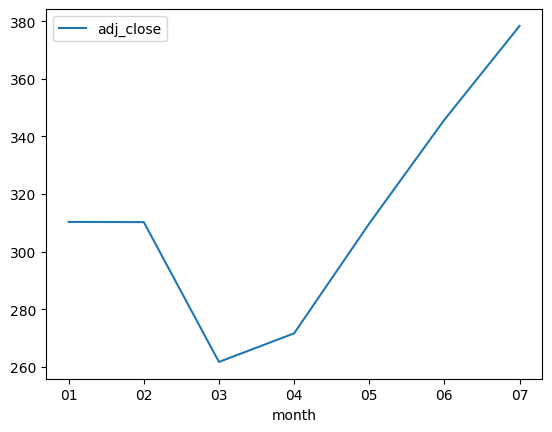

In [93]:
gb.plot.line()